<a href="https://colab.research.google.com/github/jooyeongkang/social-injustice-mimic-III/blob/main/Medication_Race_3_0_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

'''from google.colab import files
uploaded = files.upload()'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'from google.colab import files\nuploaded = files.upload()'

# Install Libraries
---

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats

from IPython.display import display

# **Load Data**

---



## ADMISSIONS.csv

In [83]:
#df_admission = pd.read_csv('../mimic-iii-clinical-database-1.4/ADMISSIONS.csv')
df_admission = pd.read_csv('/content/drive/MyDrive/UT Austin/Spring-2021/AI in Health/mimic-iii-clinical-database-1.4/ADMISSIONS.csv')
print(df_admission.shape)
df_admission.head()

(58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


## PATIENTS.csv

In [84]:
#df_patient = pd.read_csv('../mimic-iii-clinical-database-1.4/PATIENTS.csv')
df_patient = pd.read_csv('/content/drive/MyDrive/UT Austin/Spring-2021/AI in Health/mimic-iii-clinical-database-1.4/PATIENTS.csv')
print(df_patient.shape)
df_patient.head()

(46520, 8)


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


## **DIAGNOSES_ICD**.csv

In [85]:
#df_diagnoses_icd = pd.read_csv('../mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv')
df_diagnoses_icd = pd.read_csv('/content/drive/MyDrive/UT Austin/Spring-2021/AI in Health/mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv')
print(df_diagnoses_icd.shape)
df_diagnoses_icd.head()

(651047, 5)


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


## PRESCRIPTIONS.csv

In [86]:
#df_prescription = pd.read_csv('../mimic-iii-clinical-database-1.4/PRESCRIPTIONS.csv')
df_prescription = pd.read_csv('/content/drive/MyDrive/UT Austin/Spring-2021/AI in Health/mimic-iii-clinical-database-1.4/PRESCRIPTIONS.csv')
print(df_prescription.shape)
df_prescription.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4156450, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


# Define Functions
---

In [155]:
df_pneumonia.loc[df_pneumonia['ETHNICITY'] != 'UNKNOWN/NOT SPECIFIED', 'D5W']

0       0
1       7
2       0
3       6
4       0
       ..
1302    0
1303    0
1304    1
1305    0
1306    0
Name: D5W, Length: 1237, dtype: uint8

In [157]:
ethnicity_tmp

['WHITE', 'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO', 'ASIAN']

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [176]:
for drug in top_drug_df_pneumonia:

  tmp_anova = df_pneumonia[['ETHNICITY', drug]]
  tmp_anova.columns = ['ETHNICITY', 'DRUG']

  model = ols('DRUG ~ C(ETHNICITY)', tmp_anova).fit()
  table = anova_lm(model)
  print(drug)
  print(table)

Potassium Chloride
                  df        sum_sq    mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    120.018441  30.004610  0.762702  0.549563
Residual      1302.0  51220.546211  39.339897       NaN       NaN
0.9% Sodium Chloride
                  df        sum_sq     mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    699.148785  174.787196  3.928945  0.003552
Residual      1302.0  57922.142722   44.487053       NaN       NaN
Iso-Osmotic Dextrose
                  df       sum_sq   mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    31.691851  7.922963  1.034201  0.388251
Residual      1302.0  9974.552984  7.660947       NaN       NaN
Furosemide
                  df        sum_sq    mean_sq        F    PR(>F)
C(ETHNICITY)     4.0    187.868664  46.967166  1.64068  0.161589
Residual      1302.0  37271.889561  28.626643      NaN       NaN
NS
                  df        sum_sq    mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    235.928318  58.982080  1.717608  0.143606
Residua

In [87]:
def countplot(data, column, figsize):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    count_plot = sns.countplot(x=column, data=data, ax=ax)

    # Display count for each bar
    count_plot.set_xticklabels(count_plot.get_xticklabels())
    for p in count_plot.patches:
        height = p.get_height()
        count_plot.text(p.get_x()+p.get_width()/2., height + 0.1, height,ha="center")
    plt.show()


def unsampling(df):
  # Oversample the minority class by using SMOTE
  white = df.loc[df['ETHNICITY'] == 'WHITE']
  others = df.loc[(df['ETHNICITY'] == 'BLACK/AFRICAN AMERICAN') | (df['ETHNICITY'] == 'HISPANIC/LATINO') |
                  (df['ETHNICITY'] == 'ASIAN') | (df['ETHNICITY'] == 'UNKNOWN/NOT SPECIFIED')]

  white_undersample = resample(
      white,
      replace = False,
      n_samples = len(others),
      random_state=42
  )

  df_undersample = pd.concat([white_undersample, others], axis=0)

  # Display count for each bar
  plt.figure(figsize=(10, 5))
  count_plot = sns.countplot(x='ETHNICITY', data=df_undersample)
  count_plot.set_xticklabels(count_plot.get_xticklabels())
  for p in count_plot.patches:
      height = p.get_height()
      count_plot.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center")
  plt.show()

  return df_undersample


def mean_drug_race(df, top_drug):

  df_mean = pd.DataFrame(ethnicity_tmp, columns=['ETHNICITY'])

  for drug in top_drug:
      mean_drug = []
      for race in ethnicity_tmp:
        mean_drug.append(df.loc[df['ETHNICITY'] == race, drug].mean())   
      df_mean = pd.concat([df_mean, pd.DataFrame(mean_drug, columns=[drug])], axis=1)

  return df_mean


def plot_mean_drug_race(df_mean, top_drug):

  data = []

  for drug in df_mean:
    if drug != 'ETHNICITY':
      data.append(list(df_mean[drug]))

  data = np.array(data)
  length = len(data)
  x_label = top_drug
  
  fig, ax = plt.subplots(figsize=(30, 10))
  width = 1.0
  x = np.arange(0, length*5, 5)

  ax.bar(x, data[:,0], width, color='#F1948A', label='WHITE')
  ax.bar(x + width, data[:,1], width, color='#F7DC6F', label='BLACK/AFRICAN AMERICAN')
  ax.bar(x + (width*2), data[:,2], width, color='#7DCEA0', label='HISPANIC/LATINO')
  ax.bar(x + (width*3), data[:,3], width, color='#85C1E9', label='ASIAN')

  ax.set_ylabel('Mean of Prescription')
  ax.set_ylim(0,10)
  ax.set_xlabel('Top 10 Drugs')
  ax.set_xticks(x + width + width/2)
  ax.set_xticklabels(x_label)
  ax.set_title('Prescription per race')
  ax.legend()
  
  plt.show()


def analysis(df, top_drug):

  #countplot(df.loc[df['ETHNICITY'] != 'UNKNOWN/NOT SPECIFIED'], 'ETHNICITY', (10,6))

  #df = unsampling(df)

  df_mean = mean_drug_race(df.loc[df['ETHNICITY'] != 'UNKNOWN/NOT SPECIFIED'], top_drug)
  display(df_mean)

  plot_mean_drug_race(df_mean, top_drug)

# **Preprocess Data**
---

## **ADMISSIONS.csv**

In [88]:
if df_admission.isnull().values.any() == True:
    print('Missing value exists in {}.\nThe number of missing values is as follows:\n{}'.format('ADMISSIONS.csv', df_admission.isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value exists in ADMISSIONS.csv.
The number of missing values is as follows:
ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64


### **ETHNICITY**

#### Check for missing value

In [89]:
if df_admission['ETHNICITY'].isnull().values.any() == True:
    print('Missing value exists. The number of missing values is {}'.format(df_admission['ETHNICITY'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value does not exist.


In [90]:
df_admission['ETHNICITY'].unique()

array(['WHITE', 'UNKNOWN/NOT SPECIFIED', 'MULTI RACE ETHNICITY',
       'BLACK/AFRICAN AMERICAN', 'HISPANIC OR LATINO',
       'PATIENT DECLINED TO ANSWER', 'ASIAN', 'OTHER',
       'HISPANIC/LATINO - GUATEMALAN', 'ASIAN - VIETNAMESE',
       'AMERICAN INDIAN/ALASKA NATIVE', 'WHITE - RUSSIAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - CHINESE',
       'ASIAN - ASIAN INDIAN', 'BLACK/AFRICAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - DOMINICAN',
       'UNABLE TO OBTAIN', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'SOUTH AMERICAN',
       'WHITE - EASTERN EUROPEAN', 'CARIBBEAN ISLAND', 'ASIAN - FILIPINO',
       'ASIAN - CAMBODIAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'WHITE - BRAZILIAN', 'ASIAN - KOREAN',
       'HISPANIC/LATINO - COLOMBIAN', 'ASIAN - JAPANESE',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ASIAN - THAI',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - CUBAN',
       'MID

In [91]:
df_admission['ETHNICITY'].replace('^WHITE\D*', 'WHITE', regex=True, inplace=True)
df_admission['ETHNICITY'].replace('^BLACK\D*', 'BLACK/AFRICAN AMERICAN', regex=True, inplace=True)
df_admission['ETHNICITY'].replace('^HISPANIC\D*', 'HISPANIC/LATINO', regex=True, inplace=True)
df_admission['ETHNICITY'].replace('^ASIAN\D*', 'ASIAN', regex=True, inplace=True)
df_admission['ETHNICITY'].loc[~df_admission['ETHNICITY'].isin(['WHITE', 'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO', 'ASIAN'])] = 'UNKNOWN/NOT SPECIFIED'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


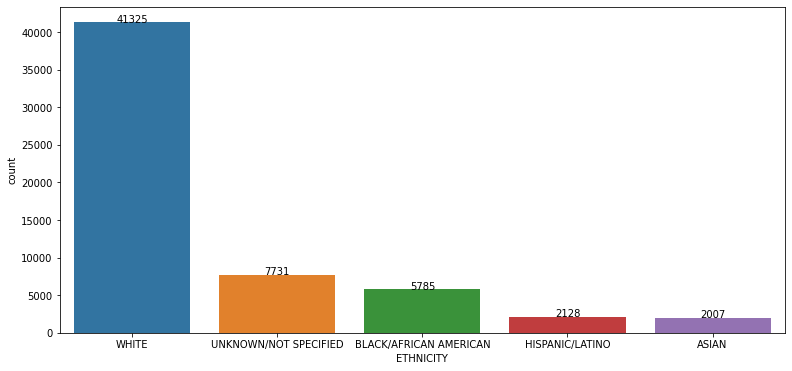

In [92]:
#value = df_admission.ETHNICITY.values
#label = df_admission.ETHNICITY.unique()
countplot(df_admission, 'ETHNICITY', (13, 6))

In [93]:
ethnicity = list(df_admission['ETHNICITY'].unique())
ethnicity_tmp = ethnicity.copy()
ethnicity_tmp.remove('UNKNOWN/NOT SPECIFIED')

### **ADMISSION_TYPE**

#### Check for missing value

In [94]:
if df_admission['ADMISSION_TYPE'].isnull().values.any() == True:
    print('Missing value exists. The number of missing values is {}'.format(df_admission['ADMISSION_TYPE'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value does not exist.


In [95]:
df_admission['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'ELECTIVE', 'NEWBORN', 'URGENT'], dtype=object)

ADMISSION_TYPE describes the type of the admission: ‘ELECTIVE’, ‘URGENT’, ‘NEWBORN’ or ‘EMERGENCY’. Emergency/urgent indicate unplanned medical care, and are often collapsed into a single category in studies. Elective indicates a previously planned hospital admission. Newborn indicates that the HADM_ID pertains to the patient’s birth.

#### Merge columns

In [96]:
df_admission['ADMISSION_TYPE'].replace('URGENT', 'EMERGENCY', inplace=True)

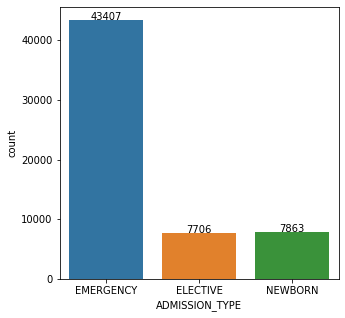

In [97]:
countplot(df_admission, 'ADMISSION_TYPE', (5, 5))

### **MARITAL_STATUS**

#### Check for missing value

In [98]:
if df_admission['MARITAL_STATUS'].isnull().values.any() == True:
    print('Missing value exists. The number of missing values is {}'.format(df_admission['MARITAL_STATUS'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value exists. The number of missing values is 10128


#### Impute missing values

In [99]:
df_admission['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)', inplace=True)

# Confirm the imputation
df_admission['MARITAL_STATUS'].isnull().values.any()

False

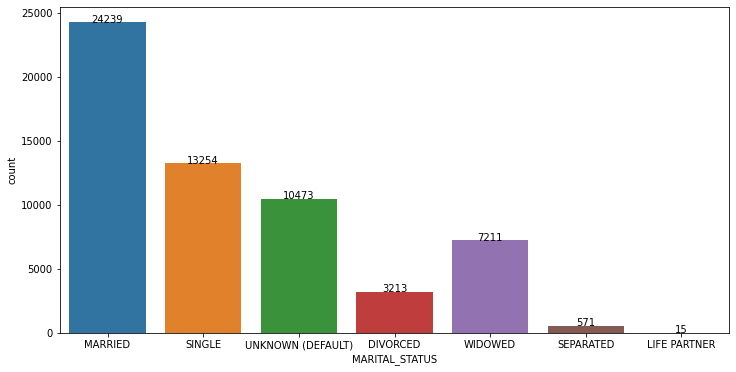

In [100]:
countplot(df_admission, 'MARITAL_STATUS', (12, 6))

#### Merge columns

In [101]:
df_admission.MARITAL_STATUS.replace('WIDOWED', 'SINGLE', inplace=True)
df_admission.MARITAL_STATUS.replace('DIVORCED', 'SINGLE', inplace=True)
df_admission.MARITAL_STATUS.replace('SEPARATED', 'UNKNOWN (DEFAULT)', inplace=True)
df_admission.MARITAL_STATUS.replace('LIFE PARTNER', 'UNKNOWN (DEFAULT)', inplace=True)

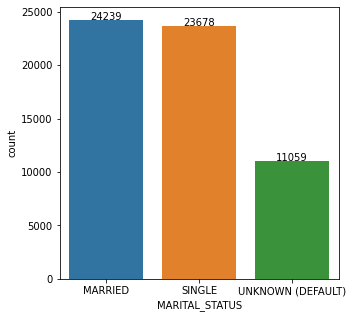

In [102]:
countplot(df_admission, 'MARITAL_STATUS', (5, 5))

### **RELIGION**

#### Check for missing value

In [103]:
if df_admission['RELIGION'].isnull().values.any() == True:
    print('Missing value exists. The number of missing values is {}'.format(df_admission['RELIGION'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value exists. The number of missing values is 458


#### Impute missing values

In [104]:
df_admission['RELIGION'].fillna('UNOBTAINABLE', inplace=True)
df_admission['RELIGION'].isnull().values.any()

False

In [105]:
df_admission['RELIGION'].unique()

array(['UNOBTAINABLE', 'CATHOLIC', 'PROTESTANT QUAKER', 'NOT SPECIFIED',
       'JEWISH', 'BUDDHIST', 'OTHER', "JEHOVAH'S WITNESS",
       'GREEK ORTHODOX', 'EPISCOPALIAN', 'HINDU', 'CHRISTIAN SCIENTIST',
       'HEBREW', 'METHODIST', 'UNITARIAN-UNIVERSALIST', 'BAPTIST',
       '7TH DAY ADVENTIST', 'MUSLIM', 'ROMANIAN EAST. ORTH', 'LUTHERAN'],
      dtype=object)

#### Rebuild category

In [106]:
df_admission['RELIGION'].loc[~df_admission['RELIGION'].isin(['NOT SPECIFIED', 'UNOBTAINABLE'])] = 'RELIGIOUS'
df_admission['RELIGION'].loc[df_admission['RELIGION'].isin(['NOT SPECIFIED', 'UNOBTAINABLE'])] = 'UNKNOWN'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


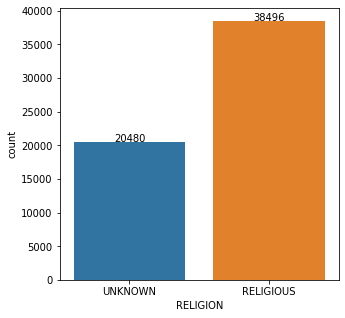

In [107]:
countplot(df_admission, 'RELIGION', (5, 5))

### **INSURANCE**

#### Check for missing value

In [108]:
if df_admission['RELIGION'].isnull().values.any() == True:
    print('Missing value exists. The number of missing values is {}'.format(df_admission['RELIGION'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value does not exist.


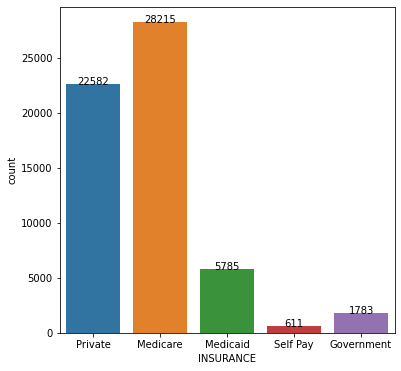

In [109]:
countplot(df_admission, 'INSURANCE', (6, 6))

In [110]:
print(df_admission.shape)
df_admission.head()

(58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNKNOWN,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,RELIGIOUS,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,RELIGIOUS,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNKNOWN,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


## Copy df_admission to df

In [111]:
diagnosis_top_10 = list(df_admission['DIAGNOSIS'].value_counts()[1:11].keys())

df = df_admission.loc[df_admission['DIAGNOSIS'].isin(diagnosis_top_10)]
#df = df[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS']]
print(df.shape)
df.head()

(8570, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
15,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
18,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1
22,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1
24,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1
25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1


## PATIENTS.csv

In [112]:
if df_patient.isnull().values.any() == True:
    print('Missing value exists in {}.\nThe number of missing values is as follows:\n{}'.format('PATIENTS.csv', df_patient.isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value exists in PATIENTS.csv.
The number of missing values is as follows:
ROW_ID             0
SUBJECT_ID         0
GENDER             0
DOB                0
DOD            30761
DOD_HOSP       36546
DOD_SSN        33142
EXPIRE_FLAG        0
dtype: int64


### DOB

#### Convert datatype

In [113]:
df_patient['DOB'] = pd.to_datetime(df_patient['DOB'])

## Merge df_patient and df

In [114]:
#df = df.merge(df_patient[['SUBJECT_ID', 'GENDER', 'DOB']], how='inner', on='SUBJECT_ID')
df = df.merge(df_patient, how='inner', on='SUBJECT_ID')
print(df.shape)
df.head()

(8570, 26)


,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,32,M,2061-08-17,NaN,NaN,NaN,0
1,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1
2,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1
3,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1
4,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1


## Create 'AGE' column

### Calculate age

In [115]:
if df['ADMITTIME'].isnull().values.any() == True:
    print('Missing value exists in {}.\nThe number of missing values is as follows:\n{}'.format('PATIENTS.csv', df['ADMITTIME'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value does not exist.


In [116]:
df_admittime_init = df[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
df_admittime_init.columns = ['SUBJECT_ID', 'ADMITTIME_INIT']
df_admittime_init['ADMITTIME_INIT'] = pd.to_datetime(df_admittime_init['ADMITTIME_INIT'])
print(df_admittime_init.shape)
df_admittime_init.head()

(7642, 2)


,SUBJECT_ID,ADMITTIME_INIT
0,13,2167-01-08 18:43:00
1,21,2134-09-11 12:17:00
2,36,2131-04-30 07:15:00
3,37,2183-08-21 16:48:00
4,42,2116-04-26 18:58:00


In [117]:
df = df.merge(df_admittime_init, how='outer', on='SUBJECT_ID')
print(df.shape)
df.head()

(8570, 27)


,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME_INIT
0,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,32,M,2061-08-17,NaN,NaN,NaN,0,2131-04-30 07:15:00
1,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00
2,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00
3,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00
4,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00


In [118]:
df['AGE'] = round((df['ADMITTIME_INIT'].sub(df['DOB'], axis=0))/np.timedelta64(1, 'Y'), 0)
print(df.shape)
df.head()

(8570, 28)


,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME_INIT,AGE
0,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,32,M,2061-08-17,NaN,NaN,NaN,0,2131-04-30 07:15:00,70.0
1,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00,69.0
2,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0
3,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0
4,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0


### Filter abnormal rows

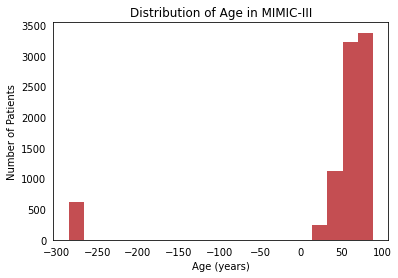

In [119]:
# Note that no ‘middle’ patients show up - this reflects the fact that MIMIC-III does not contain data from pediatric patients.
plt.hist(df['AGE'], bins=20, color='#c44e52')
plt.ylabel('Number of Patients')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in MIMIC-III')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

In [120]:
df = df.loc[df['AGE'] >= 0]
print(df.shape)
df.head()

(7956, 28)


,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME_INIT,AGE
0,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,32,M,2061-08-17,NaN,NaN,NaN,0,2131-04-30 07:15:00,70.0
1,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00,69.0
2,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0
3,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0
4,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,63.0


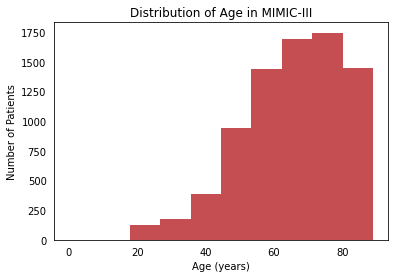

In [121]:
# Note that no ‘middle’ patients show up - this reflects the fact that MIMIC-III does not contain data from pediatric patients.
plt.hist(df['AGE'], bins=10, color='#c44e52')
plt.ylabel('Number of Patients')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in MIMIC-III')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show();

In [122]:
age_range = [(0, 20), (20, 40), (40, 60), (60, 100)]

age_dict = {0: 'minor',
            1: 'young_adult',
            2: 'middle_adult',
            3: 'senior'}

for num, category_range in enumerate(age_range):
    df['AGE'] = np.where(df['AGE'].between(category_range[0], category_range[1]), num, df['AGE'])
    
df['AGE'] = df['AGE'].replace(age_dict)
df['AGE'].value_counts()

senior          5264
middle_adult    2226
young_adult      432
minor             34
Name: AGE, dtype: int64

In [123]:
#df = df.drop(['ADMITTIME', 'DOB', 'ADMITTIME_INIT'], axis=1)
print(df.shape)
df.head()

(7956, 28)


,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME_INIT,AGE
0,36,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,UNKNOWN,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,32,M,2061-08-17,NaN,NaN,NaN,0,2131-04-30 07:15:00,senior
1,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,RELIGIOUS,MARRIED,WHITE,2183-08-21 05:58:00,2183-08-21 17:45:00,CONGESTIVE HEART FAILURE,0,1,33,M,2114-09-17,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,2183-08-21 16:48:00,senior
2,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2197-12-06 06:28:00,2197-12-06 07:43:00,GASTROINTESTINAL BLEED,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,senior
3,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,UNKNOWN,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,senior
4,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,UNKNOWN,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,336,M,2135-03-22,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,2197-12-06 07:13:00,senior


## Drop unnecessary columns

In [124]:
df = df.drop(['ROW_ID_x', 'SUBJECT_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'LANGUAGE',
       'EDREGTIME', 'EDOUTTIME', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'ADMITTIME_INIT'], axis=1)

print(df.shape)
df.head()

(7956, 9)


,HADM_ID,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,GENDER,AGE
0,182104,EMERGENCY,Medicare,UNKNOWN,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,M,senior
1,188670,EMERGENCY,Medicare,RELIGIOUS,MARRIED,WHITE,CONGESTIVE HEART FAILURE,M,senior
2,174486,EMERGENCY,Private,UNKNOWN,MARRIED,WHITE,GASTROINTESTINAL BLEED,M,senior
3,122609,EMERGENCY,Private,UNKNOWN,MARRIED,WHITE,SEPSIS,M,senior
4,101651,EMERGENCY,Private,UNKNOWN,MARRIED,WHITE,PNEUMONIA,M,senior


## Create df for each diagnosis

In [125]:
diagnosis_top_10

['PNEUMONIA',
 'SEPSIS',
 'CONGESTIVE HEART FAILURE',
 'CORONARY ARTERY DISEASE',
 'CHEST PAIN',
 'INTRACRANIAL HEMORRHAGE',
 'ALTERED MENTAL STATUS',
 'GASTROINTESTINAL BLEED',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA',
 'UPPER GI BLEED']

In [126]:
ls_df_diagnosis = []

for diagnosis in diagnosis_top_10:
  #locals()['df_'+ diagnosis.lower().replace(' ', '_')] = df.loc[df['DIAGNOSIS'] == diagnosis]
  #ls_df_diagnosis.append('df_'+ diagnosis.lower().replace(' ', '_'))
  locals()['df_'+ diagnosis.lower().replace(' ', '_').replace('\\', '_').replace('/', '_').replace('__', '_')] = df.loc[df['DIAGNOSIS'] == diagnosis]
  ls_df_diagnosis.append('df_'+ diagnosis.lower().replace(' ', '_').replace('\\', '_').replace('/', '_').replace('__', '_'))

In [127]:
ls_df_diagnosis

['df_pneumonia',
 'df_sepsis',
 'df_congestive_heart_failure',
 'df_coronary_artery_disease',
 'df_chest_pain',
 'df_intracranial_hemorrhage',
 'df_altered_mental_status',
 'df_gastrointestinal_bleed',
 'df_coronary_artery_disease_coronary_artery_bypass_graft_sda',
 'df_upper_gi_bleed']

## **PRESCRIPTION.csv**

In [128]:
if df_prescription.isnull().values.any() == True:
    print('Missing value exists in {}.\nThe number of missing values is as follows:\n{}'.format('PRESCRIPTIONS.csv', df_prescription.isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value exists in PRESCRIPTIONS.csv.
The number of missing values is as follows:
ROW_ID                     0
SUBJECT_ID                 0
HADM_ID                    0
ICUSTAY_ID           1447708
STARTDATE               3182
ENDDATE                 5421
DRUG_TYPE                  0
DRUG                       0
DRUG_NAME_POE        1664234
DRUG_NAME_GENERIC    1662989
FORMULARY_DRUG_CD       1933
GSN                   507164
NDC                     4463
PROD_STRENGTH           1362
DOSE_VAL_RX             1350
DOSE_UNIT_RX            1342
FORM_VAL_DISP           1355
FORM_UNIT_DISP          1409
ROUTE                   1156
dtype: int64


### DRUG

In [129]:
if df_prescription['DRUG'].isnull().values.any() == True:
    print('Missing value exists in {}.\nThe number of missing values is as follows:\n{}'.format('PRESCRIPTIONS.csv', df_prescription['DRUG'].isnull().sum()))
else:
    print('Missing value does not exist.')

Missing value does not exist.


In [130]:
print(df_prescription.shape)
df_prescription.head()

(4156450, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [131]:
for diagnosis in ls_df_diagnosis:
  print(diagnosis)
  locals()[diagnosis+'_tmp'] = locals()[diagnosis].merge(df_prescription[['HADM_ID', 'DRUG']], how='inner', on='HADM_ID')

df_pneumonia
df_sepsis
df_congestive_heart_failure
df_coronary_artery_disease
df_chest_pain
df_intracranial_hemorrhage
df_altered_mental_status
df_gastrointestinal_bleed
df_coronary_artery_disease_coronary_artery_bypass_graft_sda
df_upper_gi_bleed


In [132]:
for diagnosis in ls_df_diagnosis:
  locals()['top_drug_'+diagnosis] = list(locals()[diagnosis+'_tmp']['DRUG'].value_counts().nlargest(10).keys())
  tmp = locals()[diagnosis+'_tmp'].loc[locals()[diagnosis+'_tmp']['DRUG'].isin(locals()['top_drug_'+diagnosis])]
  tmp_2 = tmp.groupby('HADM_ID')['DRUG'].apply(list).reset_index()
  ls_drug = pd.get_dummies(tmp_2['DRUG'].apply(pd.Series).stack()).sum(level=0)
  tmp_2 = tmp_2.join(ls_drug, how='outer')
  tmp_2.drop(['DRUG'], axis=1, inplace=True)
  locals()[diagnosis] = locals()[diagnosis].merge(tmp_2, how='inner', on='HADM_ID')

# Diagnosis: Pneumonia

,ETHNICITY,Potassium Chloride,0.9% Sodium Chloride,Iso-Osmotic Dextrose,Furosemide,NS,Insulin,D5W,Vancomycin,5% Dextrose,Magnesium Sulfate
0,WHITE,3.916752,3.467626,3.178828,3.268243,2.893114,2.633094,2.337102,1.944502,1.780062,1.677287
1,BLACK/AFRICAN AMERICAN,3.557576,5.436364,2.830303,2.563636,2.200000,2.381818,1.684848,2.000000,2.490909,1.860606
2,HISPANIC/LATINO,3.351852,2.685185,3.611111,2.777778,4.240741,3.074074,3.129630,2.037037,1.648148,1.740741
3,ASIAN,5.000000,5.155556,2.911111,1.800000,3.911111,2.622222,1.244444,1.733333,2.177778,1.888889


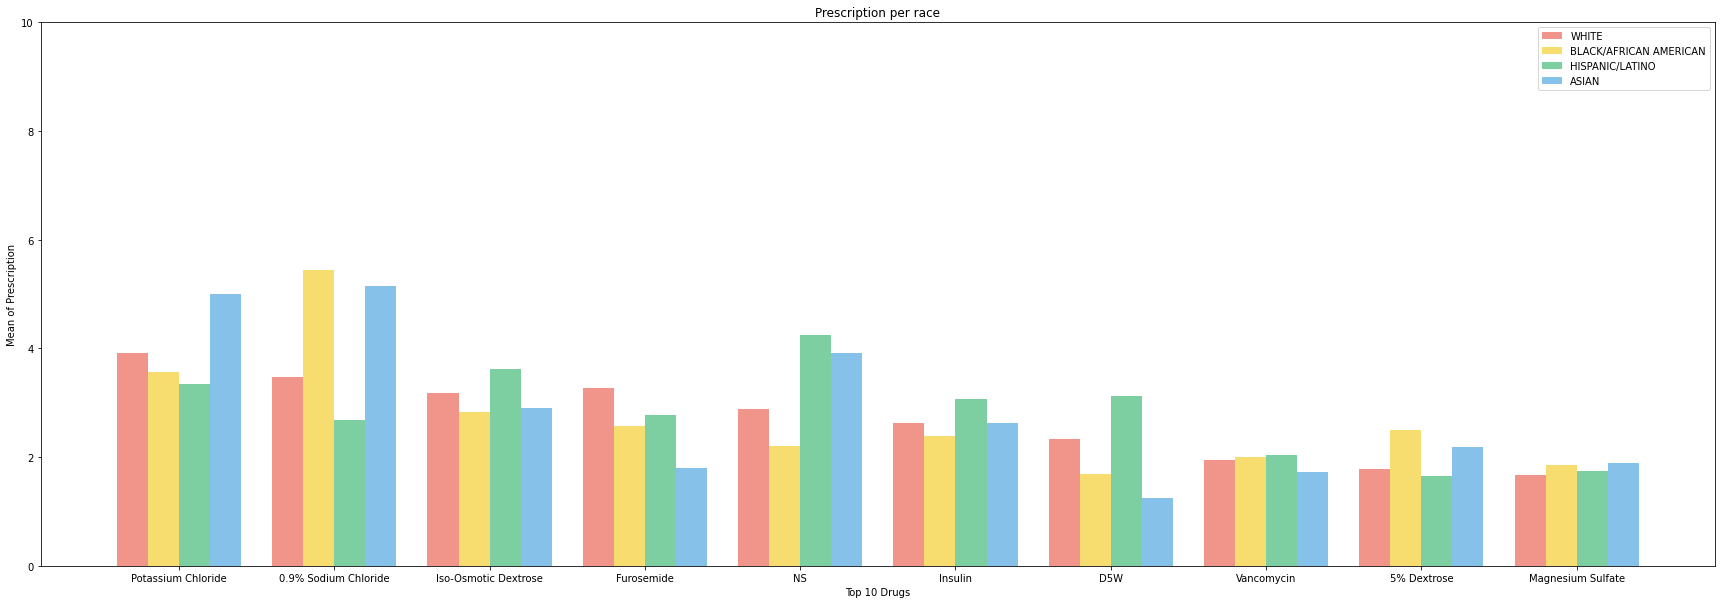

In [133]:
analysis(df_pneumonia, top_drug_df_pneumonia)

# Diagnosis: Sepsis

,ETHNICITY,Potassium Chloride,NS,D5W,Iso-Osmotic Dextrose,Insulin,0.9% Sodium Chloride,Furosemide,Magnesium Sulfate,SW,5% Dextrose
0,WHITE,5.570687,5.108949,4.383917,3.581064,3.511025,3.365759,2.783398,2.581064,2.450065,2.233463
1,BLACK/AFRICAN AMERICAN,3.926471,4.742647,4.058824,3.507353,3.404412,2.529412,1.698529,2.235294,1.933824,1.404412
2,HISPANIC/LATINO,2.864865,2.702703,2.000000,3.378378,2.567568,6.540541,0.972973,1.972973,0.972973,3.540541
3,ASIAN,4.678571,2.642857,1.428571,2.500000,2.000000,4.714286,1.035714,2.035714,1.535714,2.142857


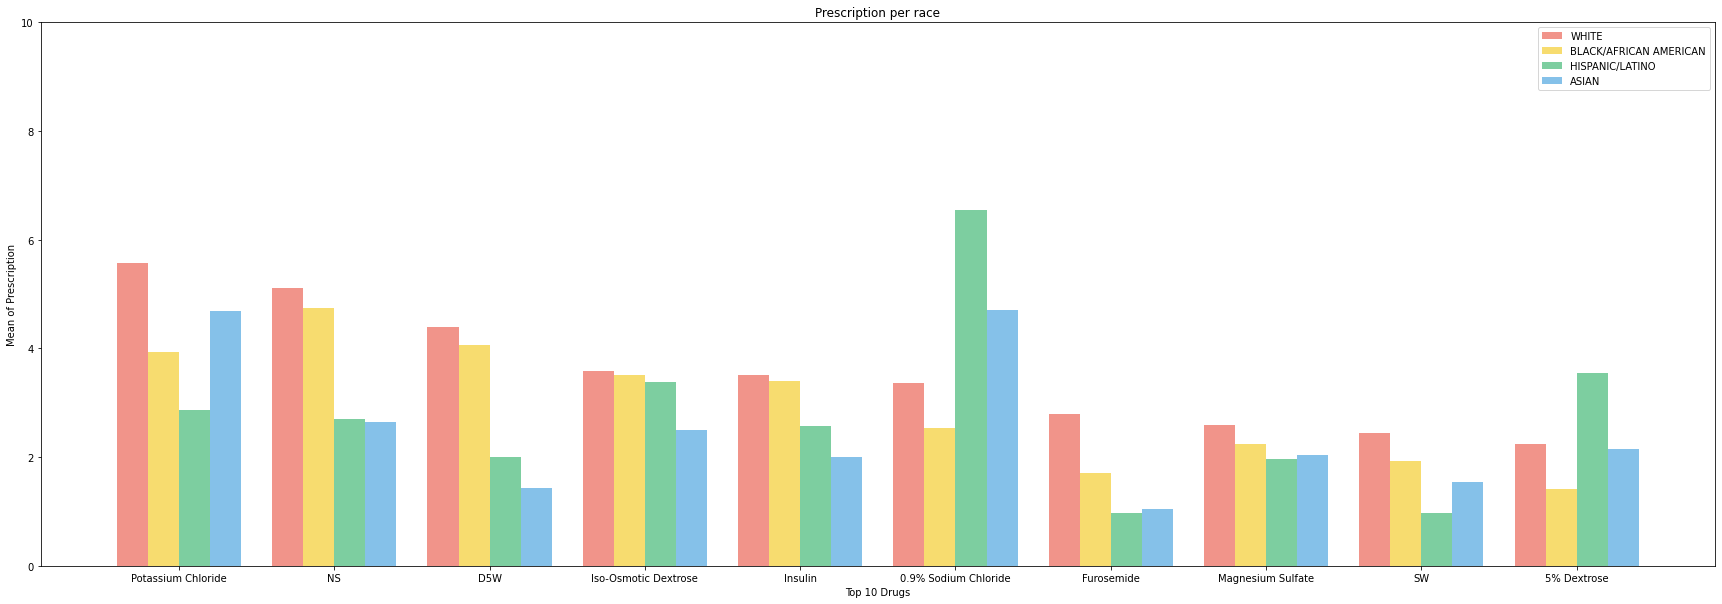

In [134]:
analysis(df_sepsis, top_drug_df_sepsis)

# Diagnosis: CONGESTIVE HEART FAILURE

,ETHNICITY,Furosemide,Potassium Chloride,D5W,Insulin,5% Dextrose,Sodium Chloride 0.9% Flush,NS,Metoprolol,Iso-Osmotic Dextrose,Warfarin
0,WHITE,7.944559,5.940452,5.574949,4.291581,2.096509,2.010267,1.981520,1.887064,1.850103,1.712526
1,BLACK/AFRICAN AMERICAN,5.595238,4.202381,4.386905,4.767857,1.154762,1.785714,1.839286,1.750000,1.500000,1.244048
2,HISPANIC/LATINO,7.583333,7.625000,3.291667,4.791667,3.041667,1.708333,1.750000,0.750000,1.666667,0.666667
3,ASIAN,8.533333,3.533333,2.533333,8.733333,4.666667,2.333333,1.066667,1.466667,2.000000,2.666667


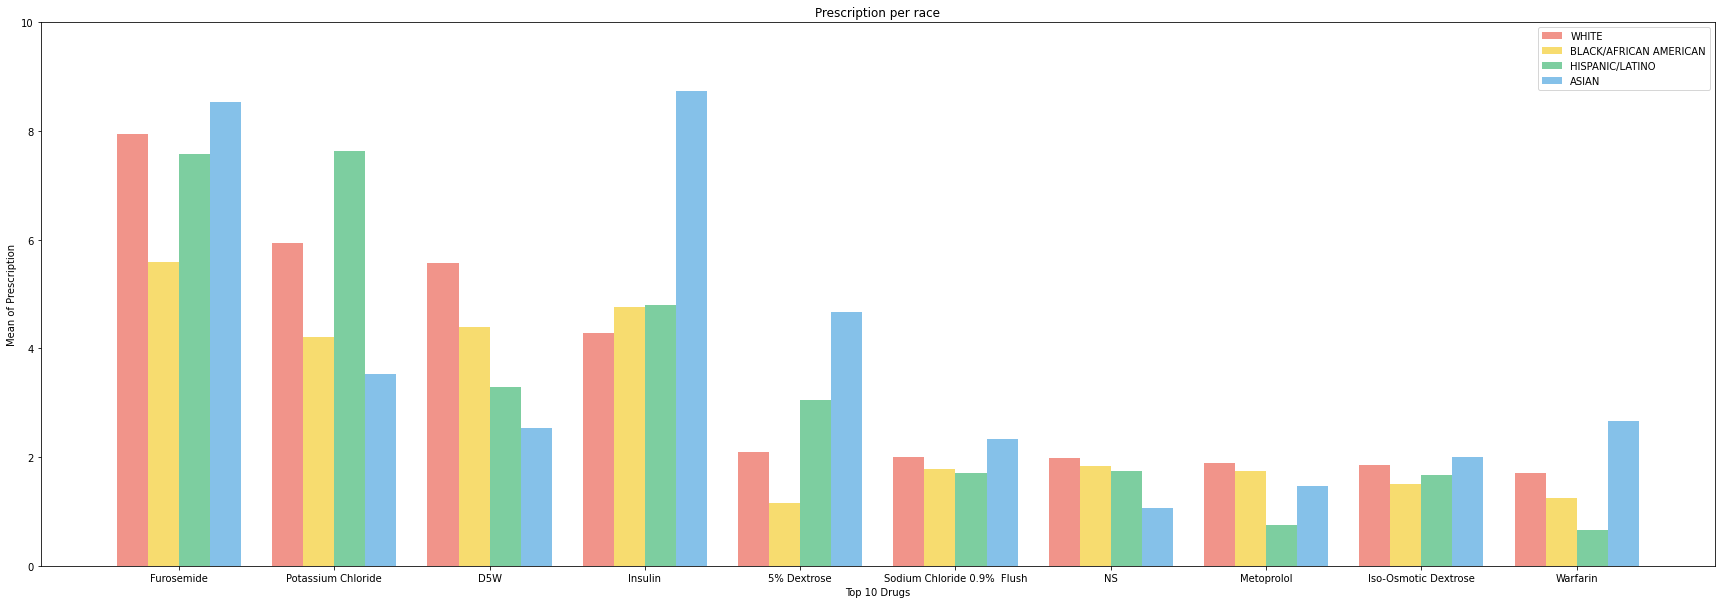

In [135]:
analysis(df_congestive_heart_failure, top_drug_df_congestive_heart_failure)

# Diagnosis: CORONARY ARTERY DISEASE

,ETHNICITY,D5W,Furosemide,Potassium Chloride,Insulin,Acetaminophen,Metoprolol,Metoprolol Tartrate,Sodium Chloride 0.9% Flush,Docusate Sodium,Ranitidine
0,WHITE,5.134387,4.365613,4.071146,3.800395,3.503953,2.889328,2.820158,2.478261,2.199605,2.160079
1,BLACK/AFRICAN AMERICAN,12.428571,8.857143,7.214286,8.571429,3.214286,2.000000,2.285714,2.000000,1.785714,2.214286
2,HISPANIC/LATINO,2.076923,3.961538,3.115385,8.076923,3.730769,1.153846,5.576923,3.115385,2.538462,2.423077
3,ASIAN,3.777778,5.222222,4.111111,3.666667,4.222222,1.888889,4.777778,3.333333,2.333333,3.000000


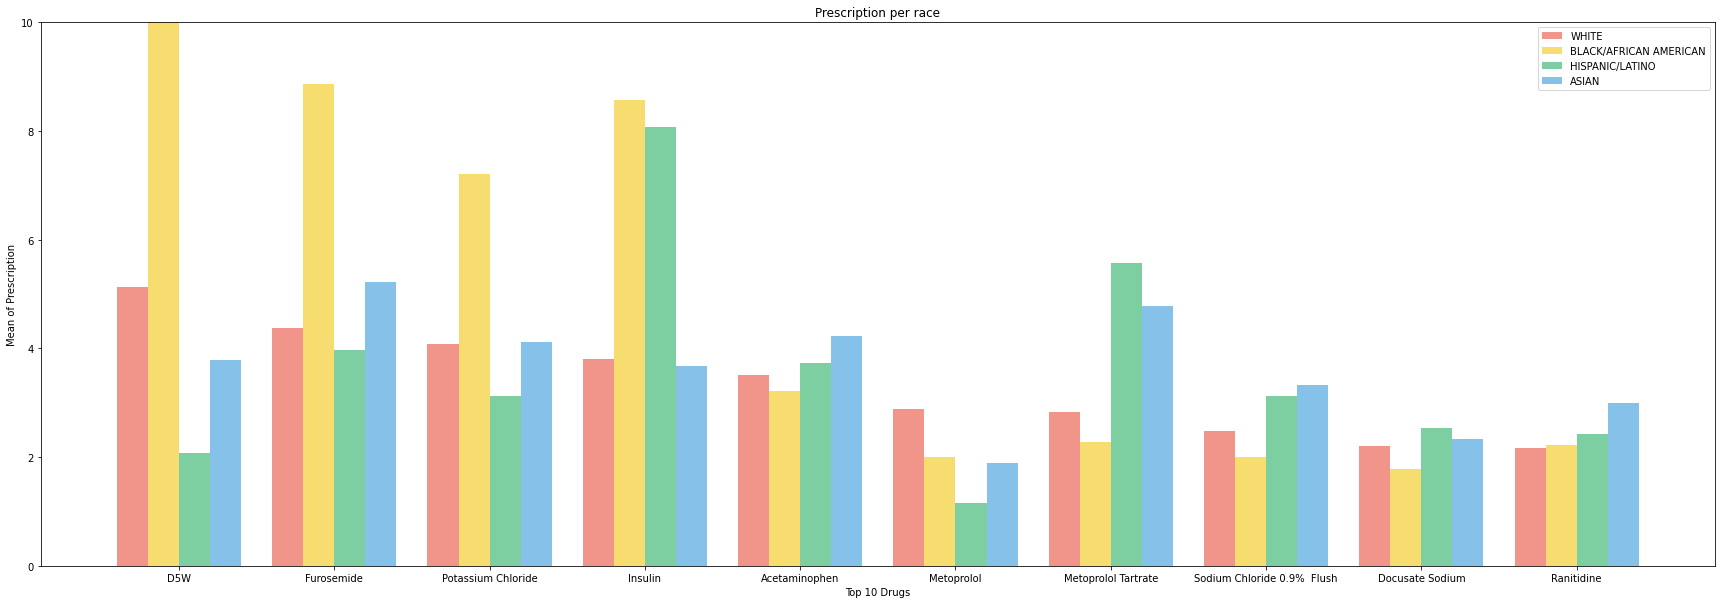

In [136]:
analysis(df_coronary_artery_disease, top_drug_df_coronary_artery_disease)

# Diagnosis: CHEST PAIN

,ETHNICITY,D5W,Potassium Chloride,Furosemide,Insulin,Metoprolol Tartrate,Sodium Chloride 0.9% Flush,Acetaminophen,Metoprolol,5% Dextrose,Heparin
0,WHITE,3.853565,3.909441,3.768786,3.113680,2.707129,2.292871,2.256262,2.077071,1.701349,1.703276
1,BLACK/AFRICAN AMERICAN,3.100000,3.328571,2.685714,6.028571,1.985714,2.128571,1.628571,1.457143,2.342857,2.042857
2,HISPANIC/LATINO,1.708333,3.083333,1.833333,4.541667,1.041667,1.708333,1.625000,1.291667,1.333333,1.166667
3,ASIAN,2.631579,2.947368,1.578947,0.684211,2.421053,2.894737,2.052632,1.684211,3.000000,1.315789


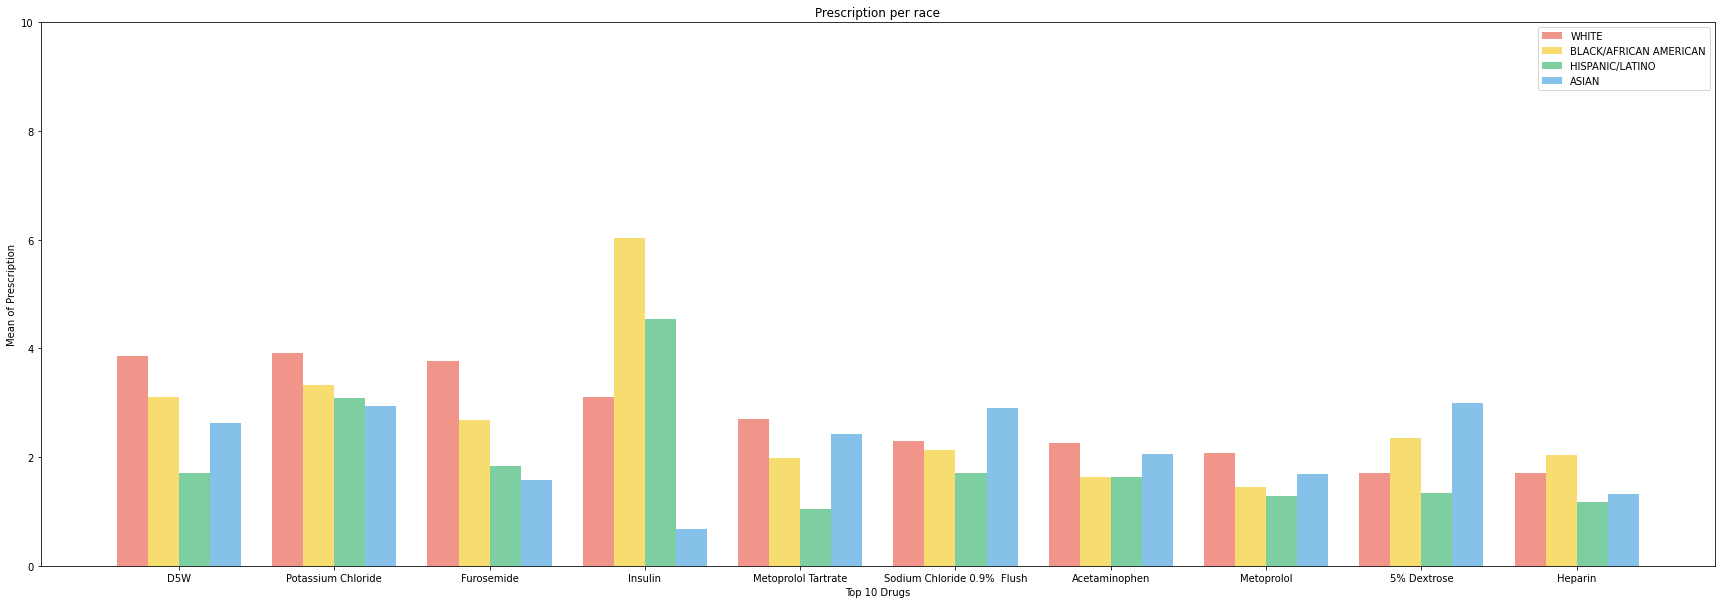

In [137]:
analysis(df_chest_pain, top_drug_df_chest_pain)

# Diagnosis: INTRACRANIAL HEMORRHAGE

,ETHNICITY,0.9% Sodium Chloride,Potassium Chloride,Insulin,NS,Sodium Chloride 0.9% Flush,Magnesium Sulfate,Metoprolol Tartrate,SW,Acetaminophen,5% Dextrose
0,WHITE,4.578189,4.176955,2.500000,2.310700,1.786008,1.701646,1.744856,1.646091,1.582305,1.290123
1,BLACK/AFRICAN AMERICAN,4.657143,5.800000,3.914286,2.400000,2.200000,1.657143,1.428571,2.485714,1.542857,1.857143
2,HISPANIC/LATINO,7.250000,6.375000,2.916667,3.458333,2.208333,2.791667,2.500000,2.625000,1.833333,3.375000
3,ASIAN,3.681818,2.500000,1.681818,1.409091,2.090909,1.772727,0.227273,1.181818,0.909091,0.909091


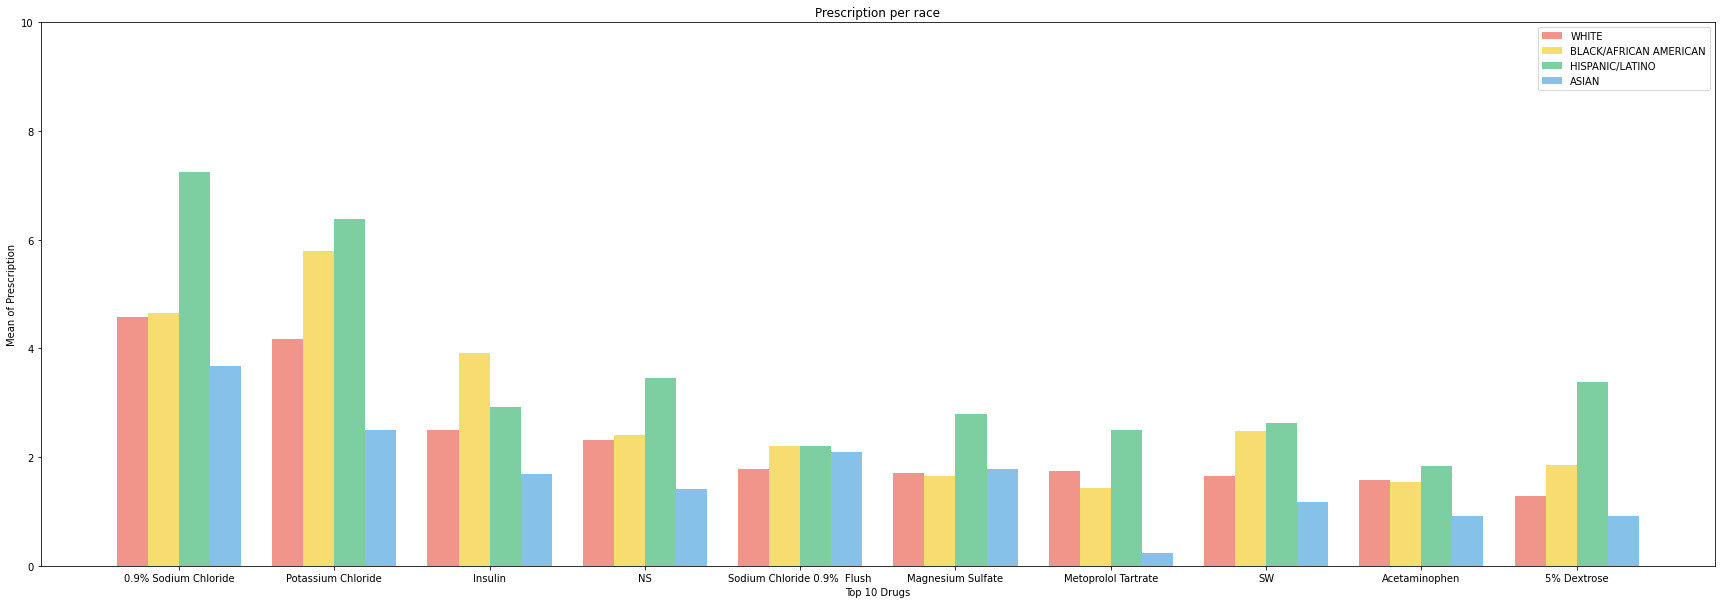

In [138]:
analysis(df_intracranial_hemorrhage, top_drug_df_intracranial_hemorrhage)

# Diagnosis: ALTERED MENTAL STATUS

,ETHNICITY,0.9% Sodium Chloride,Potassium Chloride,Insulin,Iso-Osmotic Dextrose,NS,5% Dextrose,Sodium Chloride 0.9% Flush,Furosemide,Magnesium Sulfate,Lorazepam
0,WHITE,4.138889,3.914530,2.502137,2.333333,2.179487,2.006410,1.822650,1.634615,1.576923,1.611111
1,BLACK/AFRICAN AMERICAN,4.500000,3.735849,4.603774,2.566038,2.698113,2.481132,2.103774,1.726415,1.924528,1.245283
2,HISPANIC/LATINO,4.172414,3.896552,2.586207,2.103448,3.413793,2.206897,1.965517,2.448276,2.068966,2.206897
3,ASIAN,3.545455,2.909091,6.272727,2.363636,2.545455,1.090909,1.454545,2.000000,2.000000,1.090909


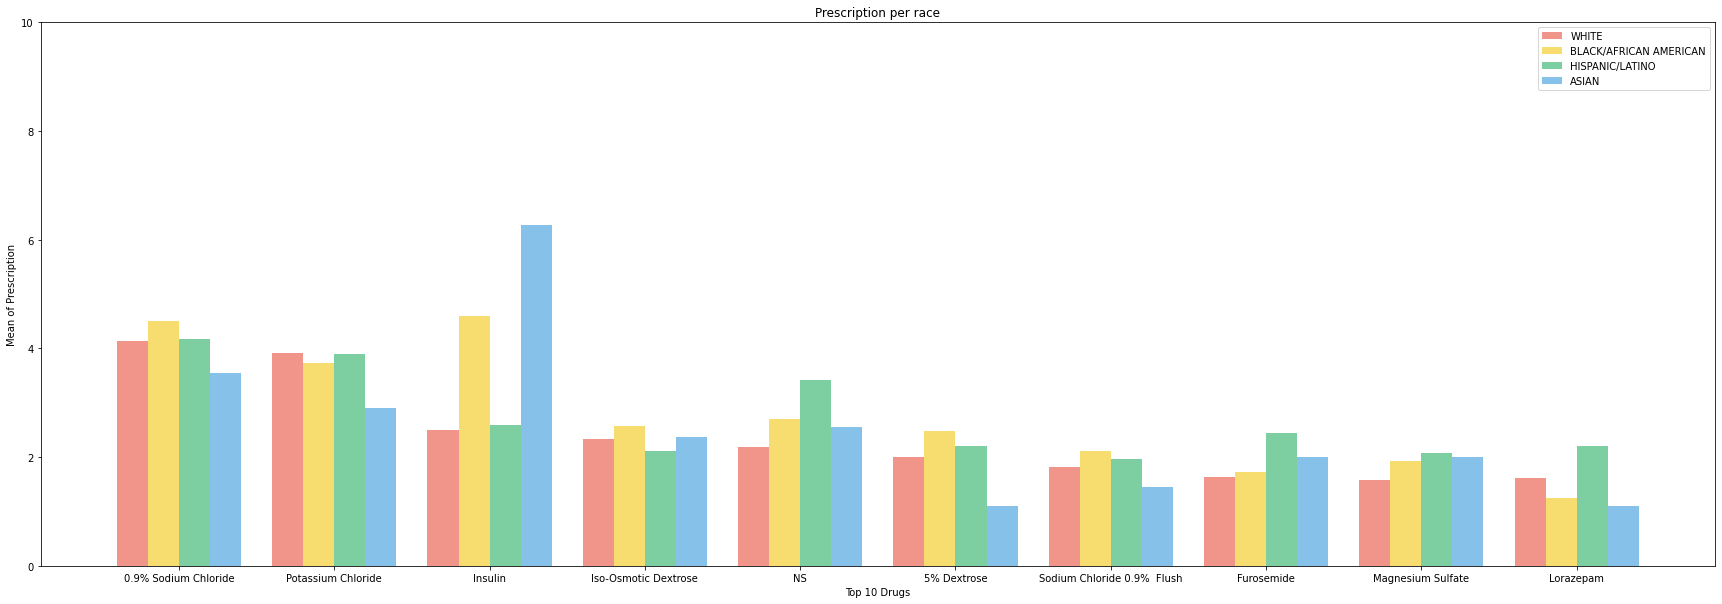

In [139]:
analysis(df_altered_mental_status, top_drug_df_altered_mental_status)

# Diagnosis: GASTROINTESTINAL BLEED

,ETHNICITY,Potassium Chloride,NS,D5W,Magnesium Sulfate,Furosemide,0.9% Sodium Chloride,Insulin,SW,Sodium Chloride 0.9% Flush,Pantoprazole
0,WHITE,3.600939,3.298122,2.103286,2.035211,1.845070,1.744131,1.453052,1.544601,1.495305,1.342723
1,BLACK/AFRICAN AMERICAN,3.298246,3.543860,1.403509,1.649123,1.982456,1.912281,3.771930,0.947368,1.263158,1.157895
2,HISPANIC/LATINO,2.785714,2.357143,1.071429,1.642857,1.142857,2.071429,1.642857,1.214286,1.071429,1.428571
3,ASIAN,2.052632,1.421053,0.368421,0.736842,0.789474,1.368421,0.578947,0.526316,1.052632,1.368421


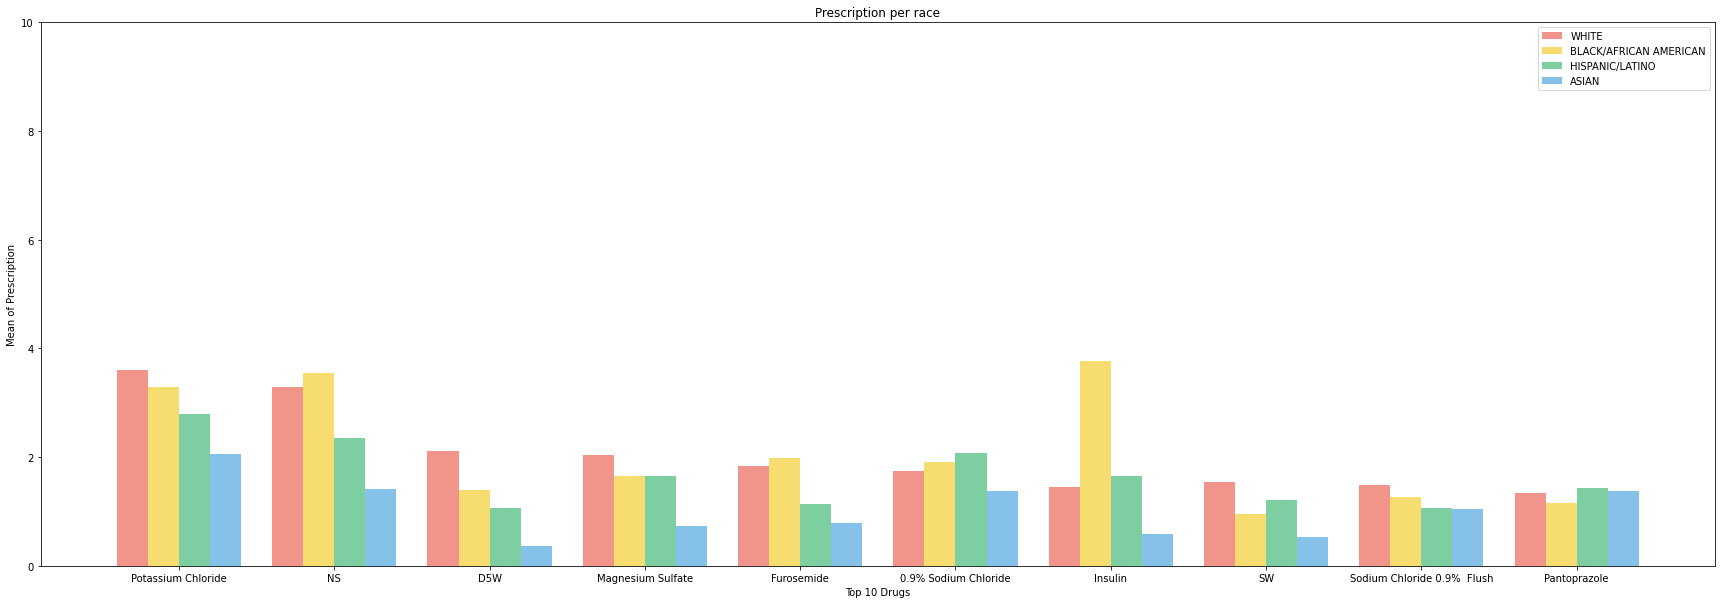

In [140]:
analysis(df_gastrointestinal_bleed, top_drug_df_gastrointestinal_bleed)

# Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA

,ETHNICITY,Metoprolol Tartrate,Furosemide,Acetaminophen,Potassium Chloride,Insulin,Ranitidine,0.9% Sodium Chloride,Morphine Sulfate,Sodium Chloride 0.9% Flush,Docusate Sodium
0,WHITE,3.754923,3.682713,3.542670,3.428884,3.343545,2.647702,2.507659,2.190372,2.133479,2.063457
1,BLACK/AFRICAN AMERICAN,2.882353,3.529412,3.235294,3.352941,5.352941,3.000000,1.117647,1.823529,1.529412,1.941176
2,HISPANIC/LATINO,4.680000,3.160000,3.320000,3.160000,3.160000,2.800000,3.040000,1.720000,2.440000,2.120000
3,ASIAN,3.387097,2.967742,3.322581,3.354839,2.129032,2.483871,2.516129,2.000000,2.096774,2.096774


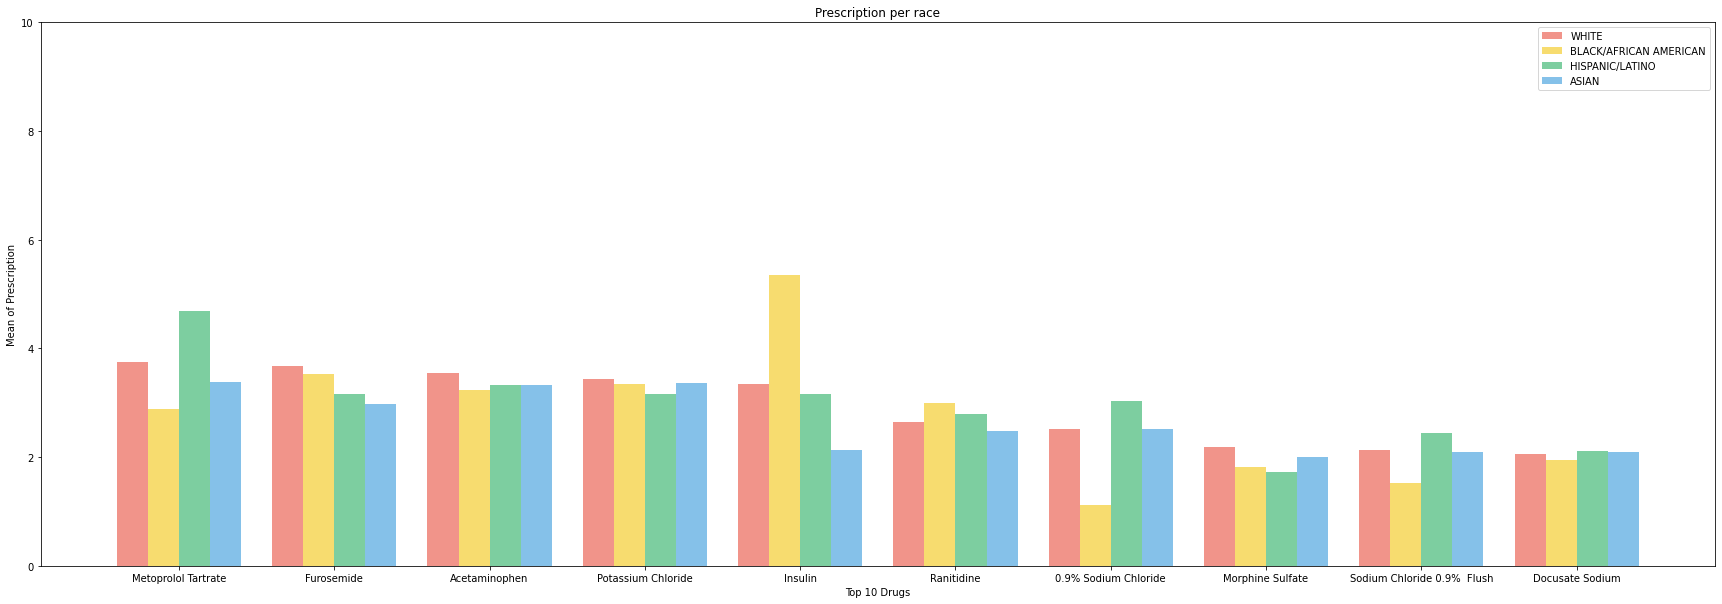

In [141]:
analysis(df_coronary_artery_disease_coronary_artery_bypass_graft_sda, top_drug_df_coronary_artery_disease_coronary_artery_bypass_graft_sda)

# Diagnosis: UPPER GI BLEED

,ETHNICITY,0.9% Sodium Chloride,Potassium Chloride,Insulin,Pantoprazole,NS,Sodium Chloride 0.9% Flush,Magnesium Sulfate,5% Dextrose,Vial,Iso-Osmotic Dextrose
0,WHITE,3.591029,2.617414,1.593668,1.781003,1.939314,1.696570,1.585752,1.163588,1.218997,1.160950
1,BLACK/AFRICAN AMERICAN,4.076923,2.430769,2.938462,2.046154,1.092308,1.507692,1.353846,1.292308,1.261538,1.107692
2,HISPANIC/LATINO,3.656250,2.125000,3.343750,1.718750,0.718750,1.625000,1.281250,1.312500,1.156250,0.781250
3,ASIAN,2.720000,1.560000,1.080000,1.760000,1.920000,1.600000,0.800000,0.600000,1.240000,0.560000


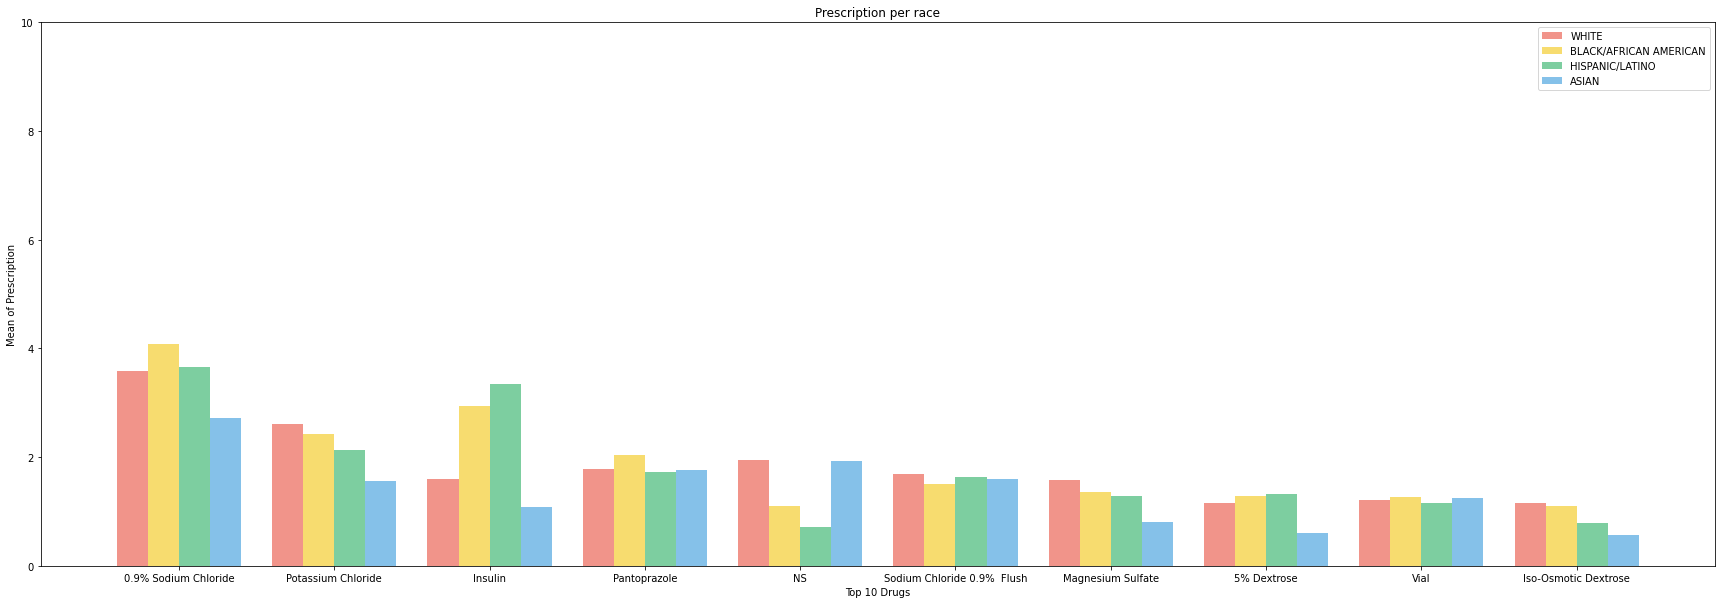

In [142]:
analysis(df_upper_gi_bleed, top_drug_df_upper_gi_bleed)

In [143]:
df_pneumonia

,HADM_ID,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,GENDER,AGE,0.9% Sodium Chloride,5% Dextrose,D5W,Furosemide,Insulin,Iso-Osmotic Dextrose,Magnesium Sulfate,NS,Potassium Chloride,Vancomycin
0,101651,EMERGENCY,Private,UNKNOWN,MARRIED,WHITE,PNEUMONIA,M,senior,0,1,0,0,7,1,0,0,5,1
1,170467,EMERGENCY,Medicare,RELIGIOUS,SINGLE,BLACK/AFRICAN AMERICAN,PNEUMONIA,F,middle_adult,0,0,7,4,0,1,6,16,8,0
2,112077,EMERGENCY,Medicare,RELIGIOUS,MARRIED,WHITE,PNEUMONIA,M,senior,4,0,0,0,0,3,3,0,0,3
3,140037,EMERGENCY,Medicare,UNKNOWN,MARRIED,ASIAN,PNEUMONIA,M,senior,0,0,6,1,0,6,1,18,9,0
4,155897,EMERGENCY,Medicare,RELIGIOUS,MARRIED,WHITE,PNEUMONIA,F,senior,3,6,0,0,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,186668,EMERGENCY,Private,UNKNOWN,SINGLE,WHITE,PNEUMONIA,F,senior,7,3,0,5,2,3,2,1,5,5
1303,146313,EMERGENCY,Private,RELIGIOUS,SINGLE,BLACK/AFRICAN AMERICAN,PNEUMONIA,F,middle_adult,30,9,0,1,1,1,10,2,15,2
1304,107472,EMERGENCY,Medicare,RELIGIOUS,SINGLE,WHITE,PNEUMONIA,F,senior,2,0,1,0,0,2,1,0,0,2
1305,110990,EMERGENCY,Medicaid,UNKNOWN,SINGLE,ASIAN,PNEUMONIA,F,senior,3,1,0,0,1,5,3,0,3,2


In [178]:
for drug in top_drug_df_pneumonia:

  tmp_anova = df_pneumonia[['ETHNICITY', drug]]
  tmp_anova.columns = ['ETHNICITY', 'DRUG']

  model = ols('DRUG ~ C(ETHNICITY)', tmp_anova).fit()
  table = anova_lm(model)
  print(table)

                  df        sum_sq    mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    120.018441  30.004610  0.762702  0.549563
Residual      1302.0  51220.546211  39.339897       NaN       NaN
                  df        sum_sq     mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    699.148785  174.787196  3.928945  0.003552
Residual      1302.0  57922.142722   44.487053       NaN       NaN
                  df       sum_sq   mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    31.691851  7.922963  1.034201  0.388251
Residual      1302.0  9974.552984  7.660947       NaN       NaN
                  df        sum_sq    mean_sq        F    PR(>F)
C(ETHNICITY)     4.0    187.868664  46.967166  1.64068  0.161589
Residual      1302.0  37271.889561  28.626643      NaN       NaN
                  df        sum_sq    mean_sq         F    PR(>F)
C(ETHNICITY)     4.0    235.928318  58.982080  1.717608  0.143606
Residual      1302.0  44710.241536  34.339663       NaN       NaN
                

In [180]:
print(scipy.stats.shapiro(tmp_anova.DRUG[tmp_anova.ETHNICITY == 'WHITE']))
print(scipy.stats.shapiro(tmp_anova.DRUG[tmp_anova.ETHNICITY == 'BLACK/AFRICAN AMERICAN']))
print(scipy.stats.shapiro(tmp_anova.DRUG[tmp_anova.ETHNICITY == 'HISPANIC/LATINO']))
print(scipy.stats.shapiro(tmp_anova.DRUG[tmp_anova.ETHNICITY == 'ASIAN']))

(0.5286363959312439, 5.605193857299268e-45)
(0.7594165205955505, 3.687020916983037e-15)
(0.8088471293449402, 6.658110578428023e-07)
(0.8559266924858093, 5.2203587983967736e-05)


In [181]:
comp = MultiComparison(tmp_anova.DRUG, tmp_anova.ETHNICITY)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
ASIAN,BLACK/AFRICAN AMERICAN,0.0708,0.9436,1.0,False
ASIAN,HISPANIC/LATINO,0.3602,0.7195,1.0,False
ASIAN,UNKNOWN/NOT SPECIFIED,0.6498,0.5172,1.0,False
ASIAN,WHITE,0.4642,0.6426,1.0,False
BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,0.3203,0.749,1.0,False
BLACK/AFRICAN AMERICAN,UNKNOWN/NOT SPECIFIED,0.6808,0.4967,1.0,False
BLACK/AFRICAN AMERICAN,WHITE,0.7371,0.4612,1.0,False
HISPANIC/LATINO,UNKNOWN/NOT SPECIFIED,0.2894,0.7728,1.0,False
HISPANIC/LATINO,WHITE,0.152,0.8792,1.0,False
UNKNOWN/NOT SPECIFIED,WHITE,-0.1322,0.8949,1.0,False


In [182]:
hsd = pairwise_tukeyhsd(tmp_anova['DRUG'], tmp_anova['ETHNICITY'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ASIAN,BLACK/AFRICAN AMERICAN,-0.0283,0.9,-1.3416,1.2851,False
ASIAN,HISPANIC/LATINO,-0.1481,0.9,-1.7244,1.4281,False
ASIAN,UNKNOWN/NOT SPECIFIED,-0.2603,0.9,-1.7525,1.2318,False
ASIAN,WHITE,-0.2116,0.9,-1.4024,0.9792,False
BLACK/AFRICAN AMERICAN,HISPANIC/LATINO,-0.1199,0.9,-1.3442,1.1045,False
BLACK/AFRICAN AMERICAN,UNKNOWN/NOT SPECIFIED,-0.232,0.9,-1.346,0.8819,False
BLACK/AFRICAN AMERICAN,WHITE,-0.1833,0.9,-0.8408,0.4742,False
HISPANIC/LATINO,UNKNOWN/NOT SPECIFIED,-0.1122,0.9,-1.5266,1.3023,False
HISPANIC/LATINO,WHITE,-0.0635,0.9,-1.1553,1.0284,False
UNKNOWN/NOT SPECIFIED,WHITE,0.0487,0.9,-0.9177,1.0151,False
